In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Text(0.5, 1.0, '[6]')

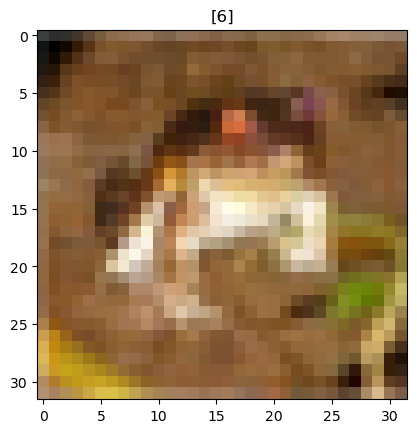

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.title(y_train[0])

In [7]:
import numpy as np

# Remodelagem dos dados de treinamento (x_train) e teste (x_test)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Acessando o primeiro exemplo após a remodelagem
x_test[0]

array([158, 112,  49, ...,  21,  67, 110], dtype=uint8)

In [8]:
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')

In [9]:
x_train /= np.amax(x_train)
x_test /= np.amax(x_train)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [12]:
modelo = Sequential()

modelo.add(BatchNormalization())

modelo.add(Dense(16, activation = 'relu', input_dim = x_train.shape[1]))
modelo.add(Dropout(0.2))

modelo.add(Dense(10, activation='softmax'))

In [ ]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

modelo.fit(x_train, y_train, batch_size = 10, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
5000/5000 [==============================] - 222s 38ms/step - loss: 2.0560 - accuracy: 0.2606 - val_loss: 1461.0559 - val_accuracy: 0.1962
Epoch 2/5
5000/5000 [==============================] - 81s 15ms/step - loss: 1.9155 - accuracy: 0.3049 - val_loss: 785.6115 - val_accuracy: 0.1947
Epoch 3/5
5000/5000 [==============================] - 69s 14ms/step - loss: 1.8802 - accuracy: 0.3251 - val_loss: 588.9715 - val_accuracy: 0.2378
Epoch 4/5
5000/5000 [==============================] - 89s 18ms/step - loss: 1.8476 - accuracy: 0.3345 - val_loss: 598.5580 - val_accuracy: 0.2352
Epoch 5/5
 650/5000 [==>...........................] - ETA: 1:11 - loss: 1.8319 - accuracy: 0.3449